In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Images

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_width, img_height = 32, 32 # Image dimensions for target
batch_size = 16 #batch size for loading

#  dataset loading
train_dir = '/content/drive/MyDrive/EEE476/Project/Dataset/Archive/train' #train data path
valid_dir = '/content/drive/MyDrive/EEE476/Project/Dataset/Archive/valid' #valid data path
test_dir = '/content/drive/MyDrive/EEE476/Project/Dataset/Archive/test'   #test data path



#Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to between 0 and 1
    shear_range=0.2,  # Apply random shear transformations
    horizontal_flip=True, # Randomly flip images horizontally
    brightness_range=[0.8, 1.2],  # brightness between 80% and 120%
    zoom_range=0.2, # Randomly zoom in on images
)

#rescaling for validation
test_datagen = ImageDataGenerator(rescale=1./255)

# load augmented datas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)





Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


smaller image dimensions (32x32) and a reduced batch size (16) as we are working with limited computational power.it impacts the model's ability to capture complex patterns in the images, as smaller resolutions contain less information. With lower resolution, models might struggle to learn fine details, especially for intricate classes




# CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

#CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularization to prevent overfitting
model.add(Dense(100, activation='softmax'))  # 100 classes


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2, 2, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 398,372 (1.52 MB)

 Trainable params: 397,956 (1.52 MB)

 Non-trainable params: 416 (1.62 KB)

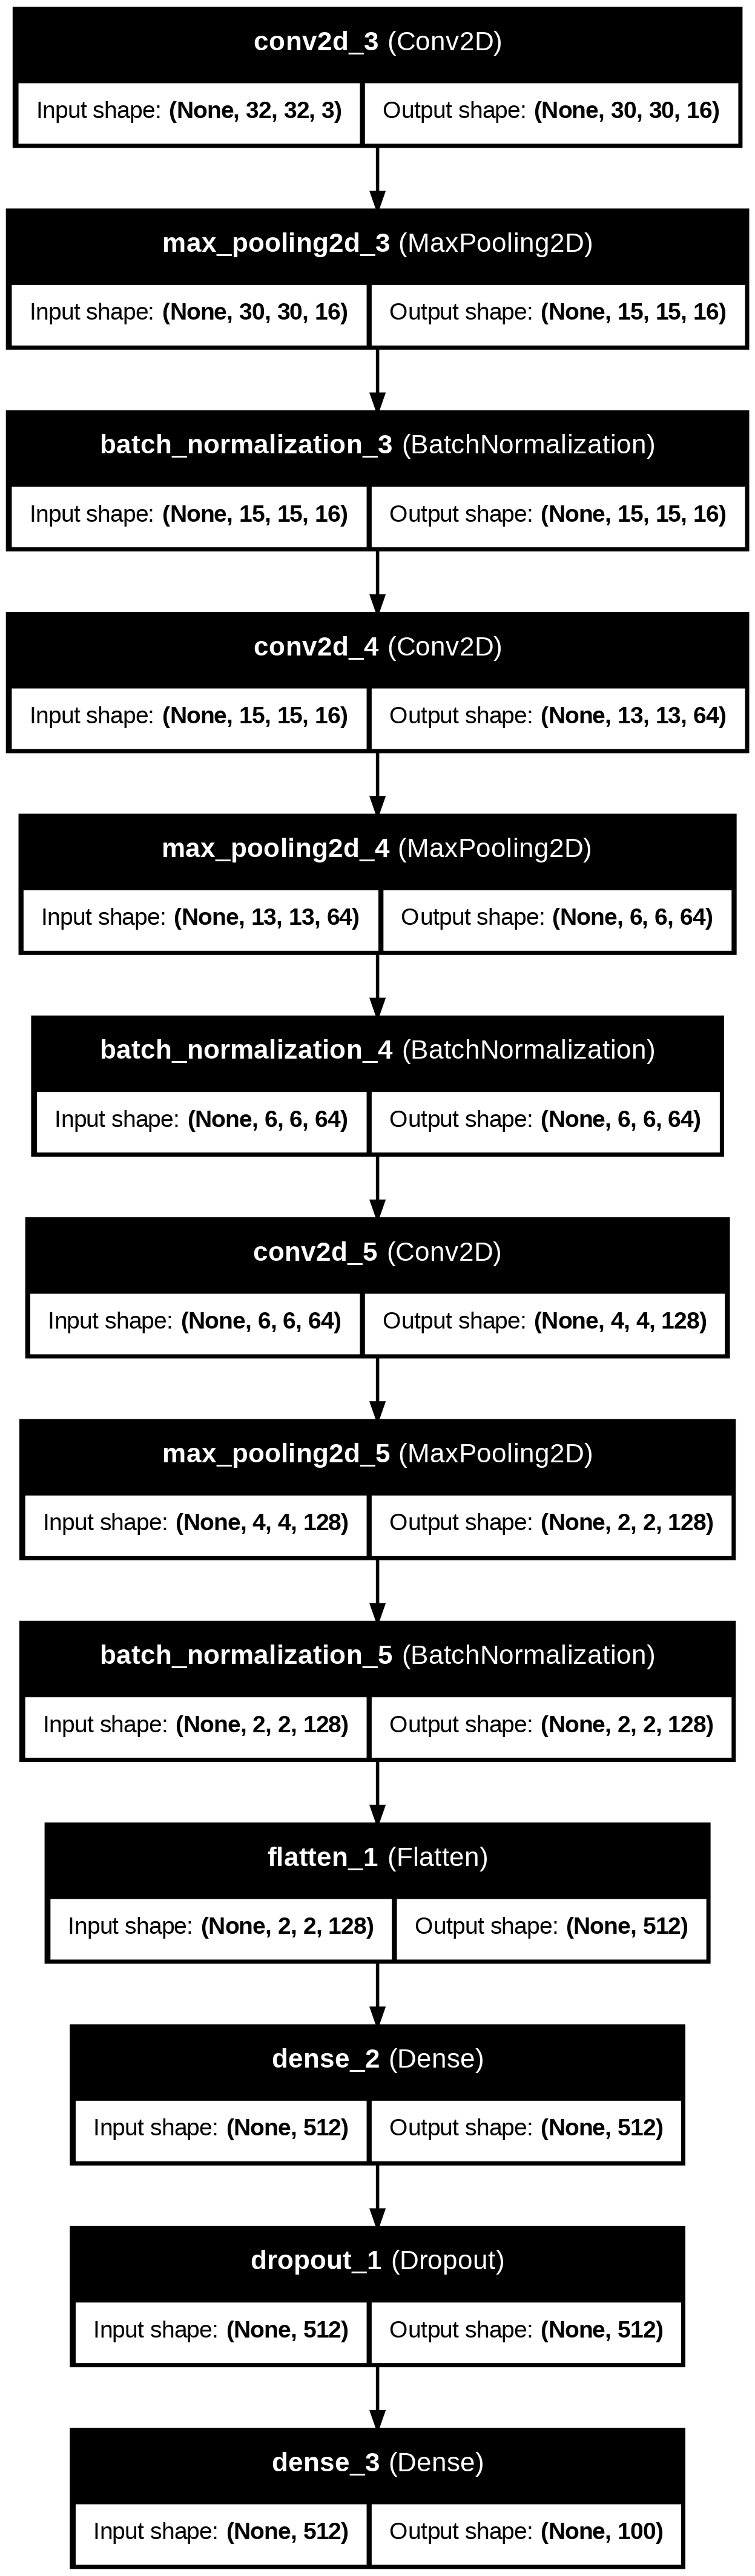

In [ ]:
#for model diagram
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


Why This Model is Chosen:





1. The increasing number of filters (16 → 64 → 128) efficiently captures progressively complex features while keeping early layers computationally lightweight.

2. With BatchNormalization and Dropout, the model generalizes better and avoids overfitting, making it more robust to unseen data.

3. While this model is relatively deep, it’s not overly complex, allowing it to learn effectively without requiring excessive computational resources. It’s a good balance between accuracy and efficiency.

4. The dense layer (512 units) is large enough to handle the complexity of classifying 100 different sports categories while using dropout to prevent overfitting.

# Train Model

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // (batch_size*10),
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // (batch_size*10),
    epochs=30
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 827s 9s/step - accuracy: 0.0228 - loss: 5.2640 - val_accuracy: 0.0000e+00 - val_loss: 4.7580
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 662s 8s/step - accuracy: 0.0419 - loss: 4.8631 - val_accuracy: 0.0208 - val_loss: 5.0416
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 605s 7s/step - accuracy: 0.0567 - loss: 4.5323 - val_accuracy: 0.0417 - val_loss: 4.3925
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 562s 7s/step - accuracy: 0.0790 - loss: 4.3184 - val_accuracy: 0.0000e+00 - val_loss: 4.1570
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 498s 6s/step - accuracy: 0.0887 - loss: 4.1542 - val_accuracy: 0.1042 - val_loss: 3.8009
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 440s 5s/step - accuracy: 0.0928 - loss: 4.1717 - val_accuracy: 0.1667 - val_loss: 3.6841
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 386s 5s/step - accuracy: 0.1179 - loss: 3.9261 - val_accuracy: 0.1875 - val_loss: 3.8314
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 382s 5s/step - accuracy: 0.1146 - loss: 3.9453 - val_accuracy: 0.1042 - val_

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


84/84 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.1636 - loss: 3.6797 - val_accuracy: 0.1667 - val_loss: 4.0964
Epoch 13/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.1691 - loss: 3.5803 - val_accuracy: 0.2292 - val_loss: 3.3634
Epoch 14/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.1314 - loss: 3.6485 - val_accuracy: 0.1875 - val_loss: 3.6340
Epoch 15/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.1562 - loss: 3.5273 - val_accuracy: 0.1667 - val_loss: 3.2224
Epoch 16/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.1783 - loss: 3.5371 - val_accuracy: 0.1875 - val_loss: 3.6676
Epoch 17/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.1724 - loss: 3.4942 - val_accuracy: 0.1667 - val_loss: 3.4170
Epoch 18/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.1833 - loss: 3.3695 - val_accuracy: 0.1875 - val_loss: 3.7333
Epoch 19/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.1927 - loss: 3.4240 - val_accuracy: 0.2292 - val_l

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/EEE476/Project/sports_classification_model.h5')

# To load the model later:
# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/EEE476/Project/sports_classification_model.h5')

# Evaluating

In [ ]:
#accuracy on test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 183s 6s/step - accuracy: 0.2985 - loss: 2.8371
Test accuracy: 0.29032257199287415


# Accuracy on 3 sets

In [ ]:
#accuracy on training, validation, and test sets
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Train Accuracy: {train_acc}")
print(f"Final Validation Accuracy: {val_acc}")
print(f"Test Accuracy: {test_acc}")


Final Train Accuracy: 0.2410714328289032
Final Validation Accuracy: 0.2916666567325592
Test Accuracy: 0.29032257199287415


# Performance across classes

In [ ]:
import numpy as np

from sklearn.metrics import classification_report

# Predict on test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step
                       precision    recall  f1-score   support

           air hockey       0.00      0.00      0.00         5
      ampute football       0.00      0.00      0.00         5
              archery       0.00      0.00      0.00         5
        arm wrestling       0.00      0.00      0.00         5
         axe throwing       0.00      0.00      0.00         5
         balance beam       0.00      0.00      0.00         5
        barell racing       0.00      0.00      0.00         5
             baseball       0.00      0.00      0.00         5
           basketball       0.00      0.00      0.00         5
       baton twirling       0.00      0.00      0.00         5
            bike polo       0.00      0.00      0.00         5
            billiards       0.00      0.00      0.00         5
                  bmx       0.00      0.00      0.00         5
              bobsled       0.00      0.00      0.00         5
              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


No, the performance is not equally good across all classes. Based on the output of the classification_report, most classes have very poor perfrmance. This indicates that the model is struggling to correctly classify most classes.




**Underperforming classes:**

A few classes like baseball and football have slightly higher performance, with F1-scores of 0.22 and 0.25.
Classes like motorcycle racing, olympic wrestling, and skydiving show marginal improvement but are still far from acceptable performance.


**Reasons for underperformance:**

* the training dataset has imbalanced class distributions. some classes have far fewer examples than others, the model might not learn to classify minority classes well.

* Handling 100 classes makes the classification task challenging,  the dataset does not provide enough samples per class or  the visual features of classes overlap significantly.

* The current model architecture might not be complex enough to capture the variability across the 100 classes. A deeper or more sophisticated model might be required to better differentiate between the classes.

* The model is underfitting the data , it hasn not learned enough meaningful patterns to distinguish between the classes, especially given the low accuracy on the test set.



# Visualize good/bad examples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


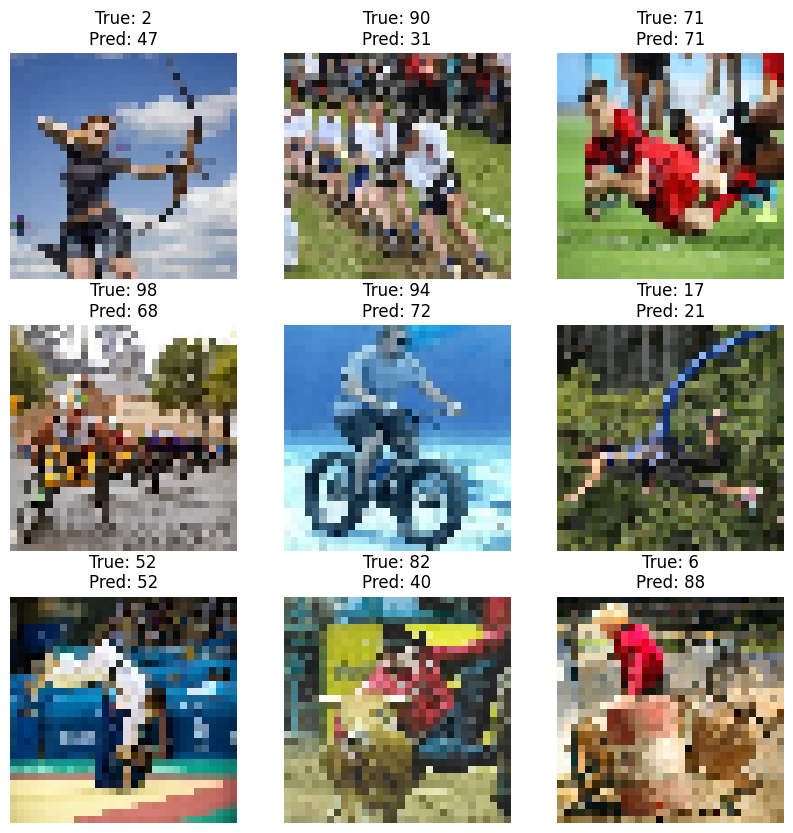

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# There are 100 classes in the dataset
label_binarizer = LabelBinarizer()
label_binarizer.fit(np.array(range(100))) # fit the binarizer on all 100 classes

# Get a batch of test images and labels
test_images, test_labels = next(test_generator)

# Get the predictions
predictions = model.predict(test_images)

# Function to plot images with their predicted and actual labels
def plot_images(images, labels, preds):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = label_binarizer.classes_[np.argmax(labels[i])]
        pred_label = label_binarizer.classes_[np.argmax(preds[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

# Visualize good predictions
plot_images(test_images, test_labels, predictions)

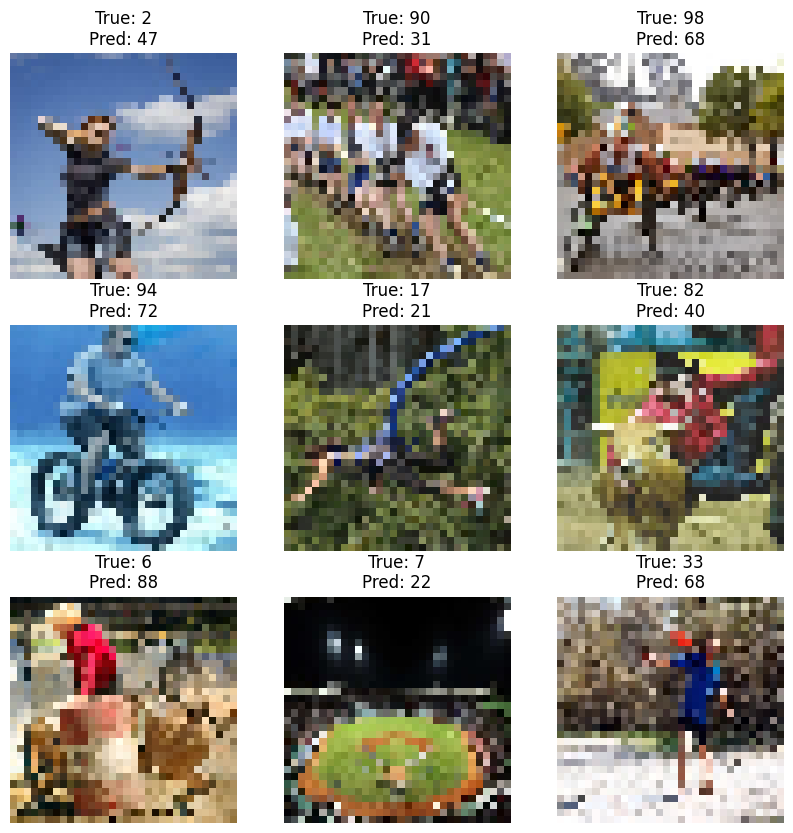

In [ ]:
# Visualize bad predictions
def plot_bad_predictions(images, labels, preds):
    plt.figure(figsize=(10, 10))
    incorrect_indices = np.where(np.argmax(labels, axis=1) != np.argmax(preds, axis=1))[0]
    for i in range(min(9, len(incorrect_indices))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[incorrect_indices[i]])
        true_label = label_binarizer.classes_[np.argmax(labels[incorrect_indices[i]])]
        pred_label = label_binarizer.classes_[np.argmax(preds[incorrect_indices[i]])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

plot_bad_predictions(test_images, test_labels, predictions)


Why the model is performing badly:

* Our model required more trainign epochs for more accuracy which results more runtime.

* It could be due to images from different classes may share visual similarities which leads the model to make incorrect predictions.

* Certain classes are underrepresented in the training dataset so the model struggle with generalization.

* The architecture of the model might not be deep or complex enough to capture the finedetails between certain classes.


In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/EEE476/Project/sports_classification_model.h5')

# To load the model later:
# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/EEE476/Project/sports_classification_model.h5')


 Visualize Training & Validation Accuracy/Loss Over Epochs

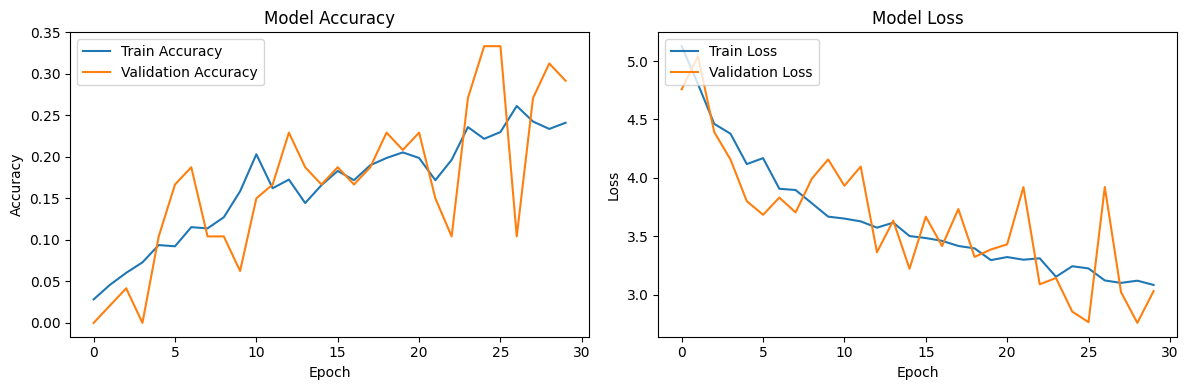

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



Summary of Observations:

Underfitting: Both training and validation accuracies are quite low (below 30%), meaning the model struggles to capture patterns in the data.
Validation Fluctuation: The validation curves for both accuracy and loss show irregualr behavior, which might indicate that the model is not generalizing well.
Potential Causes:
The model architecture might not be complex enough for the dataset.

Generate Class-Wise Accuracy for Test Set

In [ ]:
# Create a function to compute class-wise accuracy
def class_wise_accuracy(test_generator, model):
    # Number of samples per class
    class_counts = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Initialize counters for correct predictions per class
    correct_predictions = np.zeros(len(class_labels))
    total_samples = np.zeros(len(class_labels))

    # Predict for each batch of test images
    for i in range(len(test_generator)):
        test_images, test_labels = next(test_generator)
        predictions = model.predict(test_images)

        # Compare predicted and true labels
        for j in range(len(test_images)):
            true_label = np.argmax(test_labels[j])
            pred_label = np.argmax(predictions[j])
            total_samples[true_label] += 1
            if true_label == pred_label:
                correct_predictions[true_label] += 1

    # Compute accuracy per class
    class_accuracy = correct_predictions / total_samples

    # Display class-wise accuracy
    for i, label in enumerate(class_labels):
        print(f"Class {label} accuracy: {class_accuracy[i]:.2f}")

    return class_accuracy

# Compute class-wise accuracy
class_wise_accuracy(test_generator, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

array([0.8       , 0.        , 0.25      , 0.        , 0.16666667,
       0.6       , 0.25      , 0.        , 0.2       , 0.        ,
       0.        , 0.4       , 0.        , 0.5       , 0.2       ,
       0.4       , 0.2       , 0.        , 0.        , 0.2       ,
       0.        , 0.4       , 1.        , 0.4       , 0.        ,
       0.        , 0.2       , 0.66666667, 0.33333333, 0.8       ,
       0.4       , 0.4       , 0.8       , 0.        , 0.        ,
       0.6       , 0.        , 0.4       , 0.2       , 0.2       ,
       1.        , 0.83333333, 0.4       , 0.4       , 0.        ,
       0.2       , 0.2       , 0.2       , 0.25      , 0.6       ,
       0.        , 0.4       , 0.75      , 0.33333333, 0.        ,
       0.2       , 0.2       , 0.4       , 0.2       , 0.4       ,
       0.        , 0.6       , 0.2       , 0.        , 0.6       ,
       0.4       , 0.8       , 0.        , 0.6       , 0.        ,
       0.2       , 0.        , 0.8       , 0.2       , 0.6    

Identifying Underperforming Classes

In [ ]:
# Identify underperforming classes based on a threshold
def identify_underperforming_classes(class_accuracy, threshold=0.5):
    underperforming_classes = np.where(class_accuracy < threshold)[0]
    return underperforming_classes

# Set a threshold for identifying underperforming classes (e.g., below 50% accuracy)
class_accuracy = class_wise_accuracy(test_generator, model) # Calculate class accuracy and store it in a variable
underperforming_classes = identify_underperforming_classes(class_accuracy, threshold=0.5)

# Output underperforming classes
print("Underperforming Classes (Accuracy < 50%):")
for cls_idx in underperforming_classes:
    class_label = list(test_generator.class_indices.keys())[cls_idx] # Get the class label using the index
    print(f"Class {class_label} - Accuracy: {class_accuracy[cls_idx]:.2f}") # Access the accuracy from the class_accuracy variable

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

Confusion Matrix & Classification Report

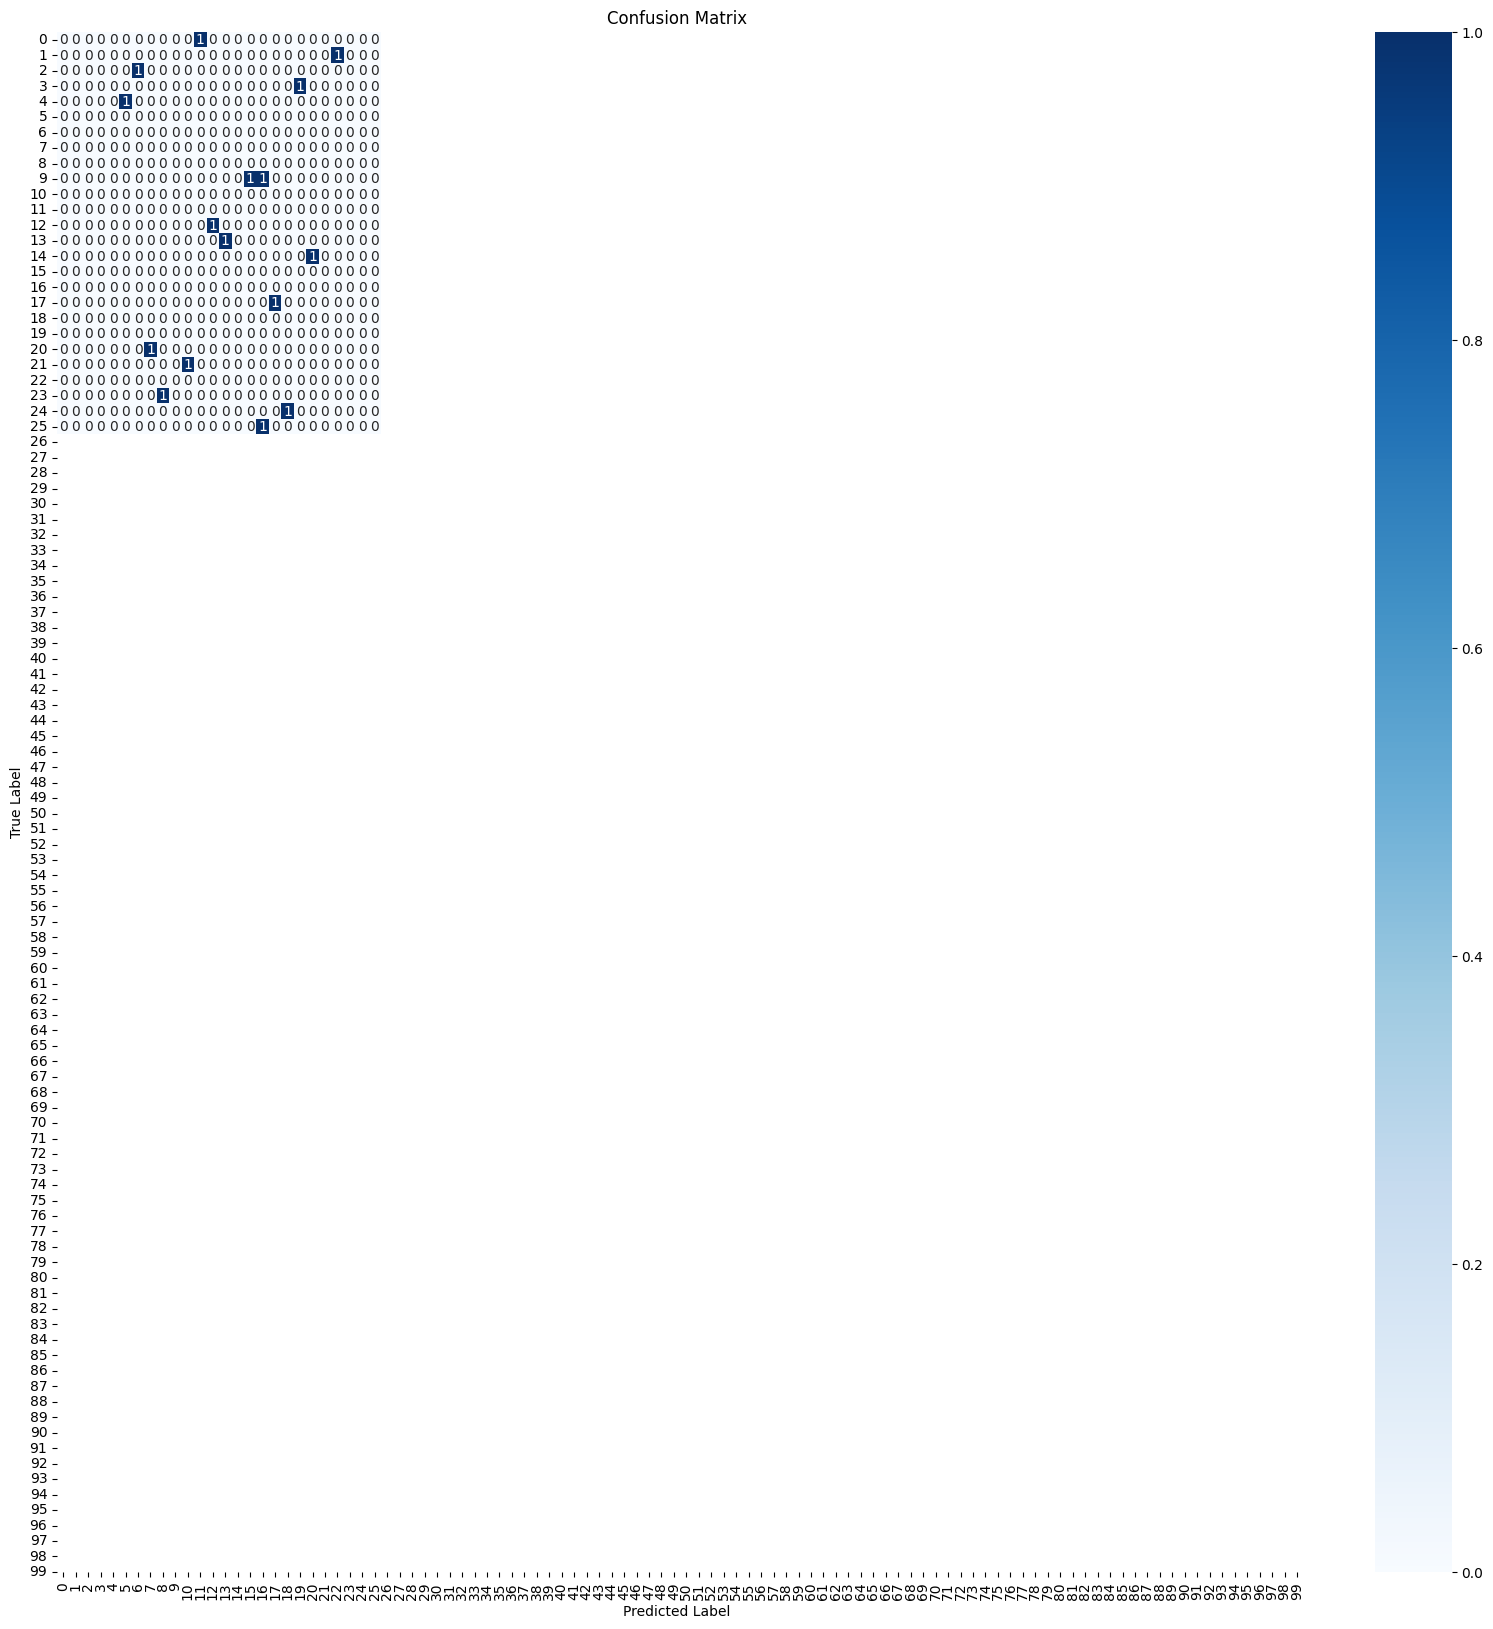

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         0
          47       0.00      0.00      0.00         0
          48       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         1
          54       0.00      0.00      0.00         1
          61       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Import the necessary modules
!pip install scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Evaluate class-wise performance
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(100)), yticklabels=list(range(100)))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

The scattered non-diagonal values imply that the model is often predicting incorrect classes, leading to poor overall performance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


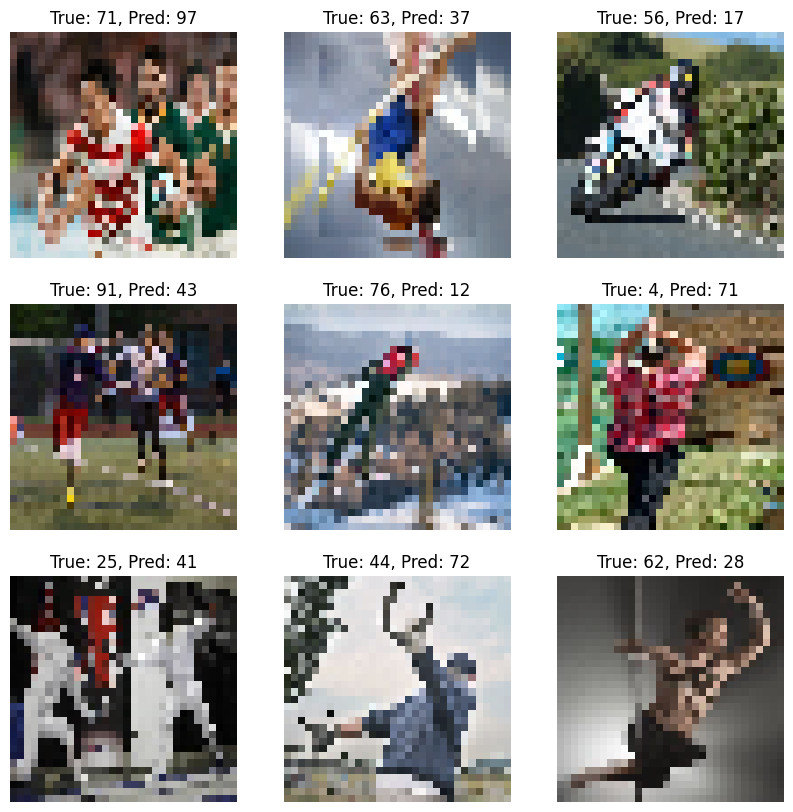

In [ ]:
# Function to explain bad predictions for underperforming classes
def visualize_bad_predictions_for_underperforming_classes(underperforming_classes, test_generator, model):
    test_images, test_labels = next(test_generator)
    predictions = model.predict(test_images)

    plt.figure(figsize=(10, 10))
    bad_count = 0

    for i in range(len(test_images)):
        true_label = np.argmax(test_labels[i])
        pred_label = np.argmax(predictions[i])

        if true_label in underperforming_classes and true_label != pred_label:
            plt.subplot(3, 3, bad_count + 1)
            plt.imshow(test_images[i])
            plt.title(f"True: {true_label}, Pred: {pred_label}")
            plt.axis('off')
            bad_count += 1
            if bad_count == 9:  # Show only 9 images
                break
    plt.show()

# Visualize bad predictions for underperforming classes
visualize_bad_predictions_for_underperforming_classes(underperforming_classes, test_generator, model)


In [ ]:
# Conclusion and Summary
print("Model Performance Summary:")
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Underperforming Classes: {underperforming_classes}")

#  improvement suggestions:
# - Fine-tune hyperparameters (e.g., learning rate, batch size)
# - Use more sophisticated data augmentations (rotation, color shift, etc.)
# -  adding  more advanced architectures like residual connections.


Model Performance Summary:
Test Accuracy: 0.29
Underperforming Classes: [ 1  2  3  4  6  7  8  9 10 11 12 14 16 17 18 19 20 21 24 25 26 28 30 31
 33 34 36 37 38 39 42 44 45 46 47 48 50 51 53 54 55 56 58 60 62 63 65 67
 69 70 71 73 75 76 77 78 79 80 81 82 83 84 86 87 89 90 91 92 93 94 97 98
 99]
